# Installing and Importing Pyforest

In [1]:
# !pip install pyforest

In [1]:
import pyforest

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import accuracy_score

sns.set_style('darkgrid')

<IPython.core.display.Javascript object>

In [2]:
# Checking all the packlages that were imported with pyfores
lazy_imports()

['from dask import dataframe as dd',
 'import plotly.express as px',
 'import datetime as dt',
 'import dash',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.preprocessing import OneHotEncoder',
 'import tqdm',
 'from sklearn.ensemble import RandomForestClassifier',
 'import gensim',
 'from sklearn.linear_model import LogisticRegression',
 'import sklearn',
 'import xgboost as xgb',
 'from sklearn.manifold import TSNE',
 'import tensorflow as tf',
 'import sys',
 'import pandas as pd',
 'import altair as alt',
 'import statistics',
 'import numpy as np',
 'from sklearn.model_selection import train_test_split',
 'import pickle',
 'from openpyxl import load_workbook',
 'import awswrangler as wr',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import matplotlib as mpl',
 'from sklearn.linear_model import LinearRegression',
 'import nltk',
 'import bokeh',
 'import os',
 'import plotly

# Importing train and test data set

In [3]:
# Importing .csv files using Pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# Checking the top 2 rows
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
# Checking the name of the columns
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Data Cleaning

In [8]:
# Checking Embarked categories
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
# Turn Sex column into numerical values
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 2)

In [10]:
# Checking Min and Max values
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

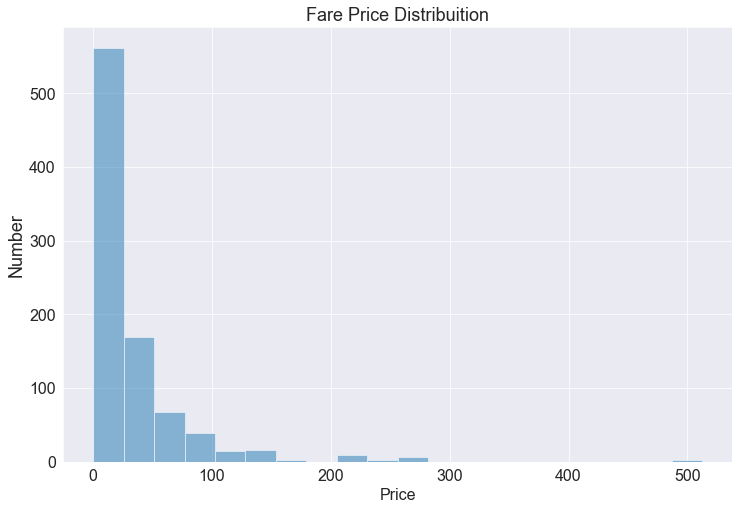

In [48]:
# Plotting fare price
sns.set_style('darkgrid')
train.Fare.plot.hist(bins=20, alpha=0.5,figsize=(12,8))
plt.title('Fare Price Distribuition', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlabel('Price', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('fare_distribution.png', bbox_inches='tight', dpi = 300)
plt.show()

In [49]:
# Initial lambda function
train['fare_category'] = train['Fare'].apply(lambda x: 1 if x > 200 else 0)

In [50]:
# Checking if it worked
train['fare_category'].value_counts()

0    871
1     20
Name: fare_category, dtype: int64

In [51]:
# Partial Lambda function
train['fare_category'] = train['Fare'].apply(lambda x: 1 if x >= 200 
                                             else 2 if x > 100 and x <= 200
                                             else 0)

In [52]:
# Checking id it worked
train['fare_category'].value_counts()

0    838
2     33
1     20
Name: fare_category, dtype: int64

In [53]:
# Complete lambda function
train['fare_category'] = train['Fare'].apply(lambda x: 1 if x >= 200 
                                             else 2 if x >= 100 and x < 200
                                             else 3 if x >= 50 and x < 100
                                             else 4)

In [54]:
train['fare_category'].value_counts()

4    730
3    108
2     33
1     20
Name: fare_category, dtype: int64

In [55]:
# Created categorical values for Embarked feature
train['Embarked'] = train['Embarked'].apply(lambda x: 0 if x == 'nan' 
                                            else 1 if x == 'S' 
                                            else 2 if x == 'C' 
                                            else 3)

In [56]:
train.drop(columns=['Name','Ticket','Cabin', 'PassengerId', 'Parch', 'Embarked'], inplace=True)

In [57]:
train.isna().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Fare               0
fare_category      0
dtype: int64

In [58]:
train.dropna(inplace=True)

# Checking if Matplotlib and Seaborn was correctly imported

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

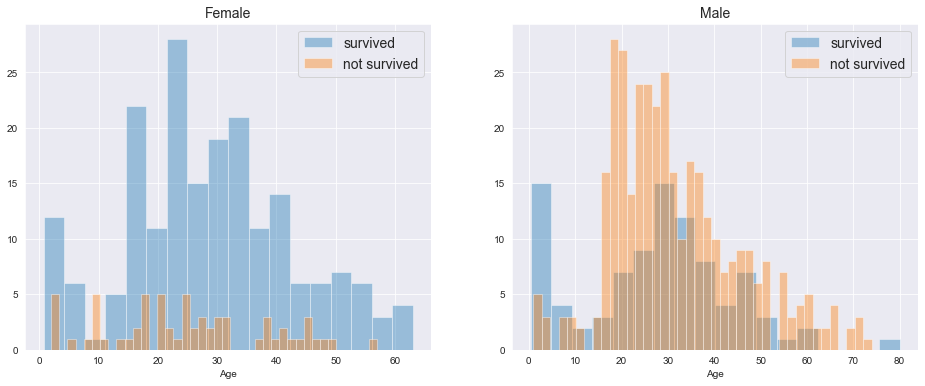

In [59]:
# checking the age and sex
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
women = train[train['Sex']==2]
men = train[train['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend(fontsize=14)
ax.set_title('Female', fontsize=14)
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend(fontsize=14)
_ = ax.set_title('Male', fontsize=14)
plt.show()

In [60]:
# Making sure there is not any NaN values
train.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Fare             0
fare_category    0
dtype: int64

In [61]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Train Test Split

In [62]:
X = train.drop(['Survived'], axis=1)
y = train.Survived

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<IPython.core.display.Javascript object>

# Modeling

In [64]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [65]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:01<00:00, 21.04it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.80,0.79,0.79,0.80,0.03
SVC,0.80,0.78,0.78,0.80,0.03
LGBMClassifier,0.79,0.77,0.77,0.79,0.13
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.13
QuadraticDiscriminantAnalysis,0.79,0.77,0.77,0.78,0.02
NearestCentroid,0.77,0.77,0.77,0.77,0.02
BernoulliNB,0.77,0.76,0.76,0.77,0.03
LogisticRegression,0.78,0.76,0.76,0.77,0.03
RandomForestClassifier,0.77,0.76,0.76,0.77,0.19


In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

<IPython.core.display.Javascript object>

In [67]:
print('Evaluation Metrics – Random Forest:')
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred, average='macro')))

Evaluation Metrics – Random Forest:
Accuracy: 0.770949720670391
F1 Score: 0.760139882995065


In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

<IPython.core.display.Javascript object>

In [73]:
print('Evaluation Metrics – Logistic Regression:')
print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred_lr)))
print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred_lr, average='macro')))

Evaluation Metrics – Logistic Regression:
Accuracy: 0.770949720670391
F1 Score: 0.7562198970270719
